In [ ]:
import numpy as np
import muon as mu
import os
from create_datasets.preprocessing import set_random_seed
from models import scSpecies
import pandas as pd
from scipy.stats import entropy
import glasbey
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import ticker
import matplotlib.patches as mpatches
import matplotlib as mpl

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

set_random_seed(1234)
np.random.seed(1234)

path = os.path.abspath('').replace('\\', '/')+'/'
data_path = path+'dataset/'
save_path = os.path.abspath('').replace('\\', '/')+'/results/'
device = "mps"

In [2]:
def return_palette(names):
    
    known_cell_types = {
        'B Cells': ('#964b00', 'Lymphoid Cells', 'B cell lineage'),
        'B/Plasma': ('#6F4E37', 'Lymphoid Cells', 'B cell lineage'),
        'Plasma': ('#c19a6b', 'Lymphoid Cells', 'B cell lineage'),

        'Naive CD8+ T': ('#A8E4A0', 'Lymphoid Cells', 'Cytotoxic T Cells'),        
        'Circ. Eff. Memory T': ('#98FB98', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'Cytotoxic CD8+': ('#A7F432', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'RM CD8+ T Cells': ('#D0F0C0', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'RM CD8+ T cells': ('#D0F0C0', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'CD8 Eff. Memory T': ('#D1FFBD', 'Lymphoid Cells', 'Cytotoxic T Cells'),        
        'Gamma-Delta T': ('#9acd32', 'Lymphoid Cells', 'Specialized T Cells'),
        'T Cells': ('#4CBB17', 'Lymphoid Cells', 'T Cells'),
        'T Cells 1': ('#08A04B', 'Lymphoid Cells', 'T Cells'),
        'T Cells 2': ('#227442', 'Lymphoid Cells', 'T Cells'),
        'T Cells 3': ('#254117', 'Lymphoid Cells', 'T Cells'),
        'Naive CD4+ T': ('#48A860', 'Lymphoid Cells', 'T helper Cells'),
        'CD4+ T helper': ('#50a88b', 'Lymphoid Cells', 'T helper Cells'),
        'Naive/CM CD4+ T': ('#2E8B57', 'Lymphoid Cells', 'T helper Cells'),
        'Th 17': ('#00A86B', 'Lymphoid Cells', 'T helper Cells'),
        'Th 1': ('#50C878', 'Lymphoid Cells', 'T helper Cells'),
        'CD4+ KLRB1 Th': ('#74C365', 'Lymphoid Cells', 'T helper Cells'),
        'Regulatory T': ('#0B6623',	'Lymphoid Cells', 'T helper Cells'),
        'Circ. NK': ('#8F9779', 'Lymphoid Cells', 'NK/NKT'),
        'Tissue Resident NK': ('#708238', 'Lymphoid Cells', 'NK/NKT'),
        'NK Cells': ('#568203', 'Lymphoid Cells', 'NK/NKT'),
        'NK/NKT Cells': ('#839B17', 'Lymphoid Cells', 'NK/NKT'),
        'NKT Cells': ('#043927', 'Lymphoid Cells' , 'NK/NKT'),     
         
        
        'ILCs': ('#7fff00', 'Lymphoid Cells', 'Innate lymphoid Cells'),
        'Prol. TAM': ('#93FFE8', 'Myeloid Cells', 'Tumor associated macrophages'),
        
        'Mg-TAM': ('#DA2C43', 'Myeloid Cells', 'Mg-TAM'),
        'Hypoxic Mg-TAM': ('#A50B5E', 'Myeloid Cells', 'Mg-TAM'),
        'IFN Mg-TAM': ('#F64A8A', 'Myeloid Cells', 'Mg-TAM'),
        'Phago/Lipid Mg-TAM': ('#F987C5', 'Myeloid Cells', 'Mg-TAM'),
        
        'Mo-TAM': ('#00637C', 'Myeloid Cells', 'Mo-TAM'),
        'IFN Mo-TAM': ('#005F5F', 'Myeloid Cells', 'Mo-TAM'),
        'Lipid Mo-TAM': ('#008794', 'Myeloid Cells', 'Mo-TAM'),
        'Hypoxic Mo-TAM': ('#5F9EA0', 'Myeloid Cells', 'Mo-TAM'),
        'SEPP1+ Mo-TAM': ('#80fdff', 'Myeloid Cells', 'Mo-TAM'),
        'Transitory Mo-TAM': ('#00d9dc', 'Myeloid Cells', 'Mo-TAM'),

        'Macrophages 1': ('#151B54', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 2': ('#191970', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 3': ('#0000A5', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 4': ('#0000CD', 'Myeloid Cells', 'Macrophages'),
        'Bile-duct LAMs': ('#5865F2', 'Myeloid Cells', 'Macrophages'),
        'MoMac1': ('#0020C2', 'Myeloid Cells', 'Macrophages'),
        'MoMac2': ('#0041C2', 'Myeloid Cells', 'Macrophages'),
        'Peritoneal Macs': ('#6960EC',  'Myeloid Cells', 'Macrophages'),
        'CV/Capsule': ('#1D2951', 'Myeloid Cells', 'Macrophages'),        
        'CV/Capsule Cd207+ Macs': ('#1D2951', 'Myeloid Cells', 'Macrophages'),
        'Macrophages': ('#101D6B', 'Myeloid Cells', 'Macrophages'),
        'immLAMs': ('#000080', 'Myeloid Cells', 'Macrophages'),
        'matLAMs': ('#1035AC', 'Myeloid Cells', 'Macrophages'),
        'Monocytes 1': ('#1974D2', 'Myeloid Cells', 'Mono/mono derived'),
        'Monocytes 2': ('#0909FF', 'Myeloid Cells', 'Mono/mono derived'),   
        'Mono/mono-derived': ('#4f86f7', 'Myeloid Cells', 'Mono/mono derived'), 
        'Trans. Monocytes': ('#6495ED', 'Myeloid Cells', 'Mono/mono derived'),
        'Trans. Monocytes 1': ('#b5d7fd', 'Myeloid Cells', 'Mono/mono derived'),               
        'Trans. Monocytes 2': ('#82EEFD', 'Myeloid Cells', 'Mono/mono derived'),
        'Monocytes': ('#87CDEE', 'Myeloid Cells', 'Mono/mono derived'),
        'Pat. Monocytes': ('#008ECC', 'Myeloid Cells', 'Mono/mono derived'),
        'Pre-moKCs and moKCs': ('#38ACEC', 'Myeloid Cells', 'Mono/mono derived'),
        'KCs': ("#5ba3bb", 'Myeloid Cells', 'Mono/mono derived'),
        
        'Basophils': ('#000000', 'Myeloid Cells', 'Granulocytes'),
        'Mast Cells': ('#00CC99', 'Myeloid Cells', 'Mast Cells'),
        'Neutrophils': ('#8c8784', 'Myeloid Cells', 'Granulocytes'),
        'ASDC': ('#483D8B', 'Myeloid Cells', 'Dendritic Cells'),
        'DCs': ('#80008B', 'Myeloid Cells', 'Dendritic Cells'),
        'DCs 3': ('#342D7E', 'Myeloid Cells', 'Dendritic Cells'),
        'Mig. DCs': ('#8f00ff', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs': ('#80008B', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs 1': ('#81007F', 'Myeloid Cells', 'Dendritic Cells'),
        'Prol. cDCs 1': ('#B041FF', 'Myeloid Cells', 'Dendritic Cells'),
        'pre-DC': ('#36013F', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs 2': ('#6F2DA8', 'Myeloid Cells', 'Dendritic Cells'),
        'Prol. cDCs 2': ('#4B0082', 'Myeloid Cells', 'Dendritic Cells'),
        'pDCs': ('#D891EF', 'Myeloid Cells', 'Dendritic Cells'),
        'Endothelials': ('#ffbf00', 'CD45- Cells', 'Endothelials'),
        'Endothelials A1': ('#D2691E', 'CD45- Cells', 'Endothelials'),
        'Endothelials A2': ('#CC6600', 'CD45- Cells', 'Endothelials'), 
        'Endothelials M': ('#E66C2C', 'CD45- Cells', 'Endothelials'),
        'Endothelials S1': ('#FF6700', 'CD45- Cells', 'Endothelials'),
        'Endothelials S2': ('#FF5F1F', 'CD45- Cells', 'Endothelials'),
        'Endothelials S3': ('#FE632A', 'CD45- Cells', 'Endothelials'),
        'Endothelials V': ('#F87217', 'CD45- Cells', 'Endothelials'),
        'Central Vein ECs': ('#fcc200', 'CD45- Cells', 'Endothelials'),
        'LSECs': ('#ffa700', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs': ('#FCE205', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs 1': ('#C35817', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs 2': ('#C04000', 'CD45- Cells', 'Endothelials'),
        'Portal Vein ECs': ('#ffd700', 'CD45- Cells', 'Endothelials'),
        'Female Epithelials': ('#F433FF', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Endometrium': ('#FF8C00', 'CD45- Cells', 'Epithelial/epithelial-like'),        
        'Female Epithelials AV': ('#FF77FF', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Female Epithelials HS': ('#FF00FF', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials': ('#A74AC7', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials 1': ('#B048B5', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials 2': ('#B666D2', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials 3': ('#7E587E', 'CD45- Cells', 'Epithelial/epithelial-like'), 
        'Mesothelial Cells': ('#E0115F', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Mesothelial 1': ('#FF4500', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Mesothelial 2': ('#E55451', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Mesothelial 3': ('#E55B3C', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Hepatocytes': ('#ff0090', 'CD45- Cells', 'Epithelial/epithelial-like'),        
        'Cholangiocytes': ('#c90016', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Capsule Fibroblasts': ('#cf1020', 'CD45- Cells', 'Structural/connective tissue'),
        'Fibroblasts': ('#ff3800', 'CD45- Cells', 'Structural/connective tissue'),
        'Fibroblast 1': ('#f08080', 'CD45- Cells', 'Structural/connective tissue'),
        'Fibroblast 2': ('#ff4500', 'CD45- Cells', 'Structural/connective tissue'),
        'Stromal':  ('#ff4500', 'CD45- Cells', 'Structural/connective tissue'),
        'Mammary Fibroblasts': ('#CC338B', 'CD45- Cells', 'Structural/connective tissue'),        
        'Stellate Cells': ('#ff033e', 'CD45- Cells', 'Structural/connective tissue'),        
        'Adipocytes': ('#FF2400', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 1': ('#FFFF33', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 2': ('#FFEF00', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 3': ('#FAF884', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 4': ('#FFE87C', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 5': ('#FFDB58', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 6': ('#FFDF00', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 7': ('#F9DB24', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes': ('#C60615', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 1': ('#FBB917', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 2': ('#FDBD01', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 3': ('#FBB117', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 4': ('#FFAE42', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 5': ('#F2BB66', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 6': ('#FFCE44', 'CD45- Cells', 'Structural/connective tissue'),
        'Pericytes': ('#FE5BAC', 'CD45- Cells', 'Structural/connective tissue'),
        'Smooth Muscle Cells': ('#B5338A', 'CD45- Cells', 'Structural/connective tissue'),
        'Myo Epithelials': ('#98AFC7', 'CD45- Cells', 'Structural/connective tissue'),
        'Platelets': ('#837E7C', 'CD45- Cells', 'Platelets'),
    }

    name_list = np.unique(names)
    lenght = 10 + len(name_list)
    colors = glasbey.extend_palette("tab10", palette_size=lenght)

    palette = {}

    j=0
    for name in name_list:       
        if name in known_cell_types.keys():
            palette[name] = known_cell_types[name]#[0]
        else: 
            print('\nAssingning color to unknown cell type: '+name)
            palette[name] = (colors[j], )
            j+=1
            
    return palette


def mode_histogram(x, bins='fd'):         
    """Return the mid-point of the histogram bin with the highest count."""
    counts, edges = np.histogram(x, bins=bins)
    j = np.argmax(counts)                
    return (edges[j] + edges[j+1]) / 2.0


def similarity_cell_types(model, cell_types_context=None, cell_types_target=None, max_sample_targ=100, max_sample_cont=100):

    context_key = 'mouse'
    target_key = 'human'

    cell_key_context = 'cell_type_fine'
    cell_key_target = 'cell_type_fine'

    cells_context = model.mdata.mod[context_key].obs[cell_key_context]
    cells_target = model.mdata.mod[target_key].obs[cell_key_target]

    if cell_types_context == None: 
        cell_types_context = np.unique(cells_context)

    if cell_types_target == None: 
        cell_types_target = np.unique(cells_target)

    arr_list = {}
    targt_list = {}

    for i in range(len(cell_types_target)):
        arr_list[cell_types_target[i]] = {}
        targt_list[cell_types_target[i]] = {}

        for j in range(len(cell_types_context)):

            target_ind = np.where(cells_target == cell_types_target[i])[0]
            target_ind = np.random.choice(target_ind, size=min(max_sample_targ, np.shape(target_ind)[0]), replace=False)  

            context_ind = np.where(cells_context == cell_types_context[j])[0]
            context_ind = np.stack([np.random.choice(context_ind, size=min(max_sample_cont, np.shape(context_ind)[0]), replace=False) for k in range(np.shape(target_ind)[0])])

            arr, like = model.similarity_metric(target_ind, context_ind, b_s=250, b_sc=25, display=False, ret_targ_likeli=True)

            arr_list[cell_types_target[i]][cell_types_context[j]] = arr
            targt_list[cell_types_target[i]][cell_types_context[j]] = like


    return  arr_list, targt_list

In [ ]:
h_dict_list = [
                {'k_neigh': 25, 'alignment': 'latent'}, 
              ]

dataset_list = [
                {'dataset': "liver_human", 'context_key': 'mouse', 'target_key': 'human', 'load_key': 'liver'},  
                {'dataset': "glio", 'context_key': 'mouse', 'target_key': 'human', 'load_key': 'glio'}, 
                {'dataset': "adipose", 'context_key': 'mouse', 'target_key': 'human', 'load_key': 'adipose'},            
               ]

df_hist_dict = {}
likeli_dict = {}

for dataset_dict in dataset_list:
    dataset = dataset_dict['dataset']
    context_key = dataset_dict['context_key']
    target_key = dataset_dict['target_key']
    load_key = dataset_dict['load_key']

    for params in h_dict_list:

        k_neigh = params['k_neigh']
        alignment = params['alignment'] 
        
        for i in range(10):
            save_key = load_key +'_'+ context_key +'_'+ target_key +'_'+ str(k_neigh) +'_'+ alignment +'_'+ str(i) 

            print(dataset, i, k_neigh, alignment)

            mdata = mu.read_h5mu(path+f"dataset/{load_key}.h5mu")

            model = scSpecies(device, 
                              mdata, 
                              path, 
                              k_neigh = k_neigh,
                              alignment = alignment,
                              context_dataset_key = context_key, 
                              target_dataset_key = target_key, 
                              random_seed = 1234*i
                              )

            model.train_context(30, save_model=False)
            model.get_representation('context', save_libsize=True) 
            model.eval_context()

            if dataset == 'liver':
                model.train_target(30, save_model=False, track_prototypes=True)
                likeli_dict[save_key] = np.array(model.sim_metric)

            else:
                model.train_target(30, save_model=False, track_prototypes=False)

            model.get_representation('target', save_libsize=True) 
            model.eval_target()

            arr_list, targt_list = similarity_cell_types(model, max_sample_targ=1000, max_sample_cont=50) #0

            cell_types_target = mdata.mod['human'].obs['cell_type_fine'].unique()
            cell_types_context = mdata.mod['mouse'].obs['cell_type_fine'].unique()

            cell_types_target = mdata.mod['human'].obs['cell_type_fine'].unique()
            cell_types_context = mdata.mod['mouse'].obs['cell_type_fine'].unique()

            df_hist = np.array([[mode_histogram((arr_list[t_key][key] - targt_list[t_key][key]).flatten()) for t_key in arr_list.keys()] for key in cell_types_context])
            df_hist = pd.DataFrame(np.transpose(df_hist), index= arr_list.keys(), columns=cell_types_context)            

            df_hist_dict[save_key] = df_hist
            
sim_liver = pd.concat([df_hist_dict['liver_mouse_human_25_latent_'+str(i)] for i in range(10)]).groupby(level=0).mean()
likeli_liver = np.mean(np.stack([likeli_dict['liver_mouse_human_25_latent_'+str(i)] for i in range(10)]), axis=-1)
sim_adipose = pd.concat([df_hist_dict['adipose_mouse_human_25_latent_'+str(i)] for i in range(10)]).groupby(level=0).mean()
sim_glio = pd.concat([df_hist_dict['glio_mouse_human_25_latent_'+str(i)] for i in range(10)]).groupby(level=0).mean()            

liver_human 0 25 latent

Pretraining on the context dataset for 30 epochs (= 38820 iterations).
Progress: 32.8% - ETA: 0:09:45 - Epoch: 10 - Iteration: 12750 - ms/Iteration: 22.47 - nELBO: 1535.4 (+0.096) - nlog_likeli: 1518.4 (+1.245) - KL-Div z: 14.043 (-0.926) - KL-Div l: 2.9434 (-0.223).           

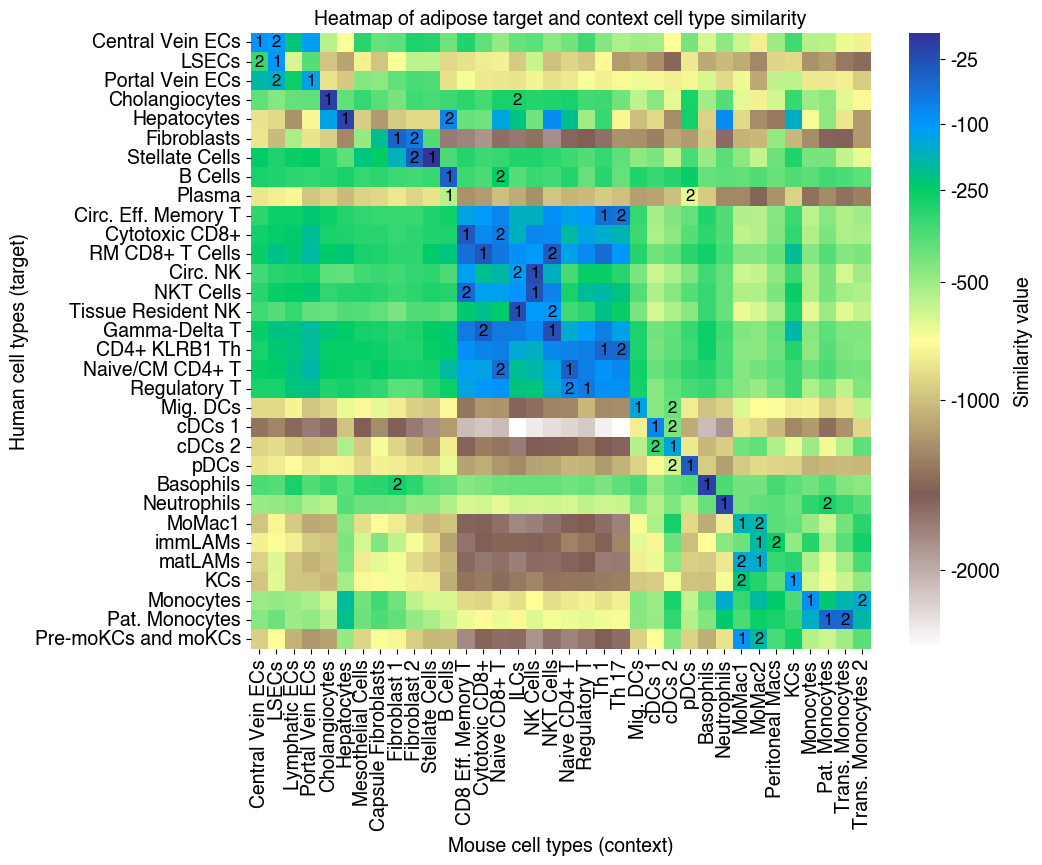

In [ ]:

df = -(sim_adipose.clip(upper=2500, lower=-2500))**0.5

ct_dict = return_palette(np.concatenate((df.index,df.columns)))
ct_dict = sorted(ct_dict.items(), key=lambda x: (x[1][1], x[1][2]) )
ct_dict = {k: (v[0], k, v[2], i + 1) for i, (k, v) in enumerate(ct_dict)}

index_ordering = np.argsort([ct_dict[ct][-1] for ct in df.index])
column_ordering = np.argsort([ct_dict[ct][-1] for ct in df.columns])

df = df.iloc[index_ordering, column_ordering]

mpl.rcParams['font.family'] = 'Helvetica'

top_3_indices = df.apply(lambda row: row.nlargest(2).index, axis=1)

row_indices = df.index
col_positions = [
    [df.columns.get_loc(col) for col in row] for row in top_3_indices
]

plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=False, cmap="terrain_r", yticklabels=df.index, xticklabels=df.columns)

for i, positions in enumerate(col_positions):
    for rank, j in enumerate(positions):  # rank: 0 (highest), 1 (second), 2 (third)
        ax.text(j + 0.5, i + 0.5, str(rank + 1), color="black", fontsize=12, 
                ha='center', va='center', fontweight='bold')

cbar = ax.collections[0].colorbar
orig_ticks = np.array([-5.0, -10.0, -15.82, -22.37, -31.63, -44.73])
sqrt_ticks = orig_ticks
orig_vals = -sqrt_ticks**2
cbar.set_ticks(sqrt_ticks.astype(int))
cbar.set_ticklabels([f"{int(v)}" for v in orig_vals])
cbar.set_label("Similarity value", labelpad=10)

plt.title("Heatmap of white adipose tissue target and context cell type similarity", fontsize=14)
plt.xlabel("Mouse cell types (context)", fontsize=14)
plt.ylabel("Human cell types (target)", fontsize=14)
plt.savefig(save_path+"adipose_similarity.png", bbox_inches='tight')
plt.show()

In [ ]:
df = -(sim_glio.clip(upper=2500, lower=-2500))**0.5

ct_dict = return_palette(np.concatenate((df.index,df.columns)))
ct_dict = sorted(ct_dict.items(), key=lambda x: (x[1][1], x[1][2]) )
ct_dict = {k: (v[0], k, v[2], i + 1) for i, (k, v) in enumerate(ct_dict)}

index_ordering = np.argsort([ct_dict[ct][-1] for ct in df.index])
column_ordering = np.argsort([ct_dict[ct][-1] for ct in df.columns])

df = df.iloc[index_ordering, column_ordering]

mpl.rcParams['font.family'] = 'Helvetica'

top_3_indices = df.apply(lambda row: row.nlargest(2).index, axis=1)

row_indices = df.index
col_positions = [
    [df.columns.get_loc(col) for col in row] for row in top_3_indices
]

plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=False, cmap="terrain_r", yticklabels=df.index, xticklabels=df.columns)

for i, positions in enumerate(col_positions):
    for rank, j in enumerate(positions):  # rank: 0 (highest), 1 (second), 2 (third)
        ax.text(j + 0.5, i + 0.5, str(rank + 1), color="black", fontsize=12, 
                ha='center', va='center', fontweight='bold')

cbar = ax.collections[0].colorbar
orig_ticks = np.array([-5.0, -10.0, -15.82, -22.37, -31.63, -44.73])
sqrt_ticks = orig_ticks
orig_vals = -sqrt_ticks**2
cbar.set_ticks(sqrt_ticks.astype(int))
cbar.set_ticklabels([f"{int(v)}" for v in orig_vals])
cbar.set_label("Similarity value", labelpad=10)

plt.title("Heatmap of glioblastoma target and context cell type similarity", fontsize=14)
plt.xlabel("Mouse cell types (context)", fontsize=14)
plt.ylabel("Human cell types (target)", fontsize=14)
plt.savefig(save_path+"glioblastoma_similarity.png", bbox_inches='tight')
plt.show()

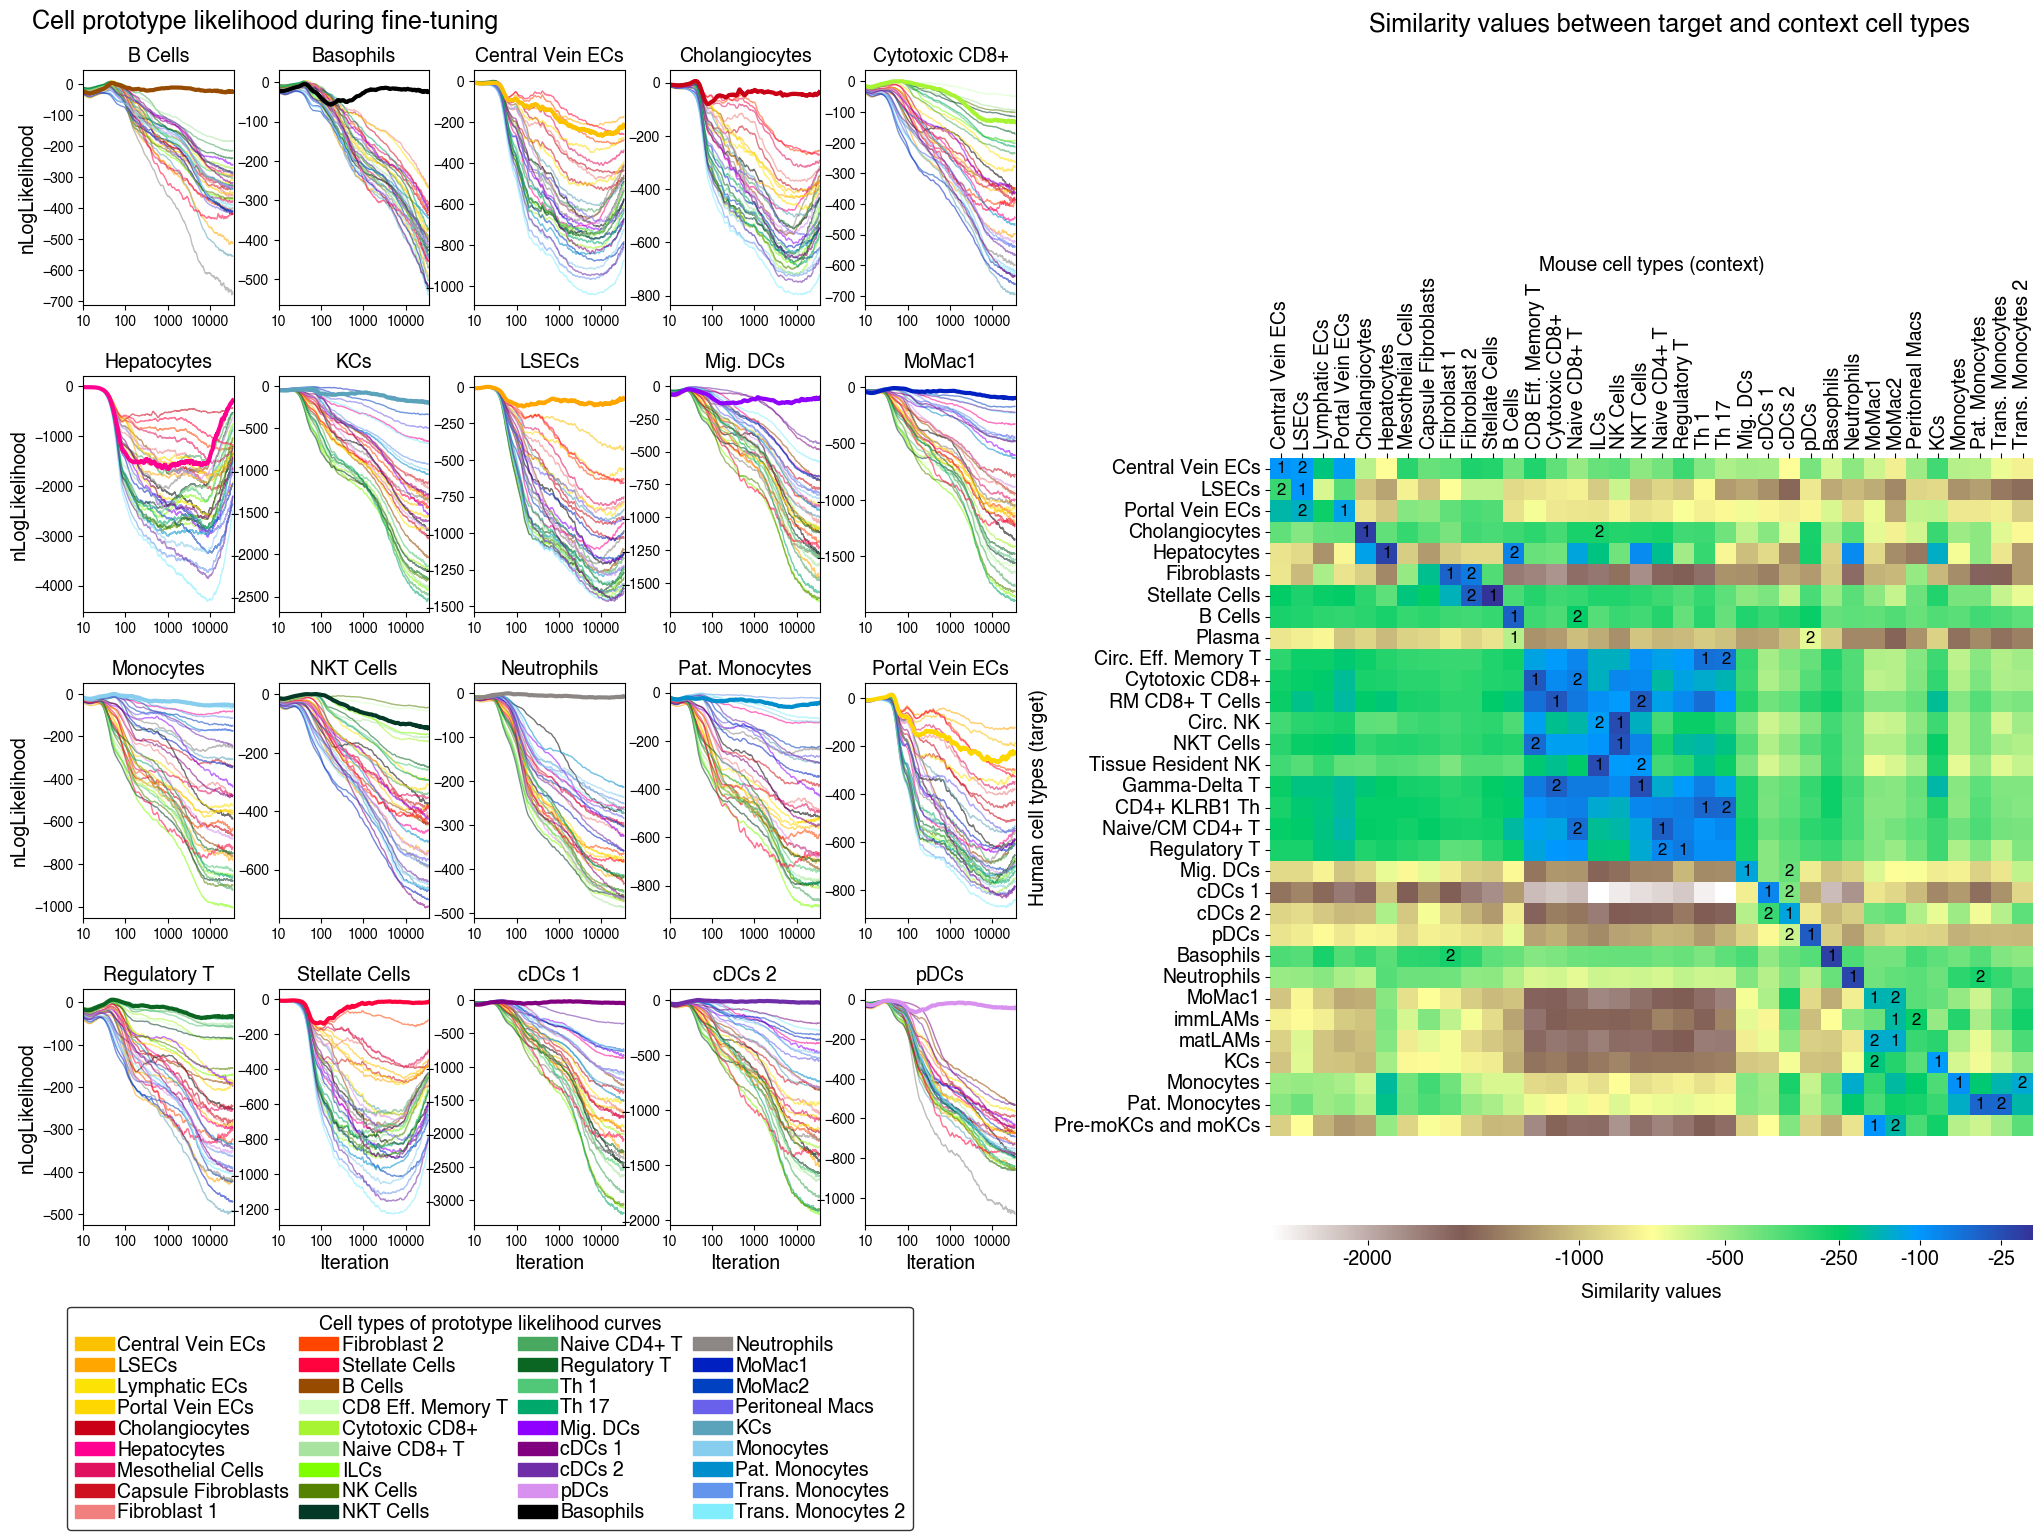

In [ ]:
df = -(sim_liver.clip(upper=2500, lower=-2500))**0.5

plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 18
})

def progressive_moving_average(y, max_window=4000):
    n = len(y)
    return np.array([
        np.mean(y[max(0, k - min(int(5 + min(k, 5) + k * 0.1), max_window) + 1): k + 1])
        for k in range(n)
    ])

ct_dict = return_palette(np.concatenate((df.index,df.columns)))
ct_dict = sorted(ct_dict.items(), key=lambda x: (x[1][1], x[1][2]) )
ct_dict = {k: (v[0], k, v[2], i + 1) for i, (k, v) in enumerate(ct_dict)}

index_ordering = np.argsort([ct_dict[ct][-1] for ct in df.index])
column_ordering = np.argsort([ct_dict[ct][-1] for ct in df.columns])
df = df.iloc[index_ordering, column_ordering]

mpl.rcParams['font.family'] = 'Helvetica'

top_indices = df.apply(lambda row: row.nlargest(2).index, axis=1)
col_positions = [
    [df.columns.get_loc(col) for col in row] for row in top_indices
]
fig = plt.figure(figsize=(26, 15), constrained_layout=True)
gs = gridspec.GridSpec(1, 2, width_ratios=[1.1, 0.9], wspace=0.3, left=0.15)

ax_heatmap = fig.add_subplot(gs[1])
pos = ax_heatmap.get_position()
cbar_ax = fig.add_axes([pos.x0, pos.y0 - 0.01, pos.width, 0.01])

sns.heatmap(
    df,
    annot=False,
    cmap=plt.cm.get_cmap("terrain").reversed(),
    ax=ax_heatmap,
    cbar_ax=cbar_ax,                      
    cbar_kws={"orientation": "horizontal"},
    xticklabels=df.columns
)

for i, positions in enumerate(col_positions):
    for rank, j in enumerate(positions):
        ax_heatmap.text(
            j + 0.5, i + 0.5, str(rank + 1),
            color="black", fontsize=12,
            ha='center', va='center', fontweight='bold'
        )

ax_heatmap.set_xlabel("Mouse cell types (context)", fontsize=14)
ax_heatmap.set_ylabel("Human cell types (target)", fontsize=14)
ax_heatmap.xaxis.tick_top()
ax_heatmap.xaxis.set_label_position('top')
ax_heatmap.tick_params(axis='x', rotation=90)
ax_heatmap.tick_params(axis='y')

ax_heatmap.set_aspect("equal")    
pos = ax_heatmap.get_position()
new_pos = [pos.x0, pos.y0 - 0.1, pos.width, pos.height]
ax_heatmap.set_position(new_pos)


cbar = ax_heatmap.collections[0].colorbar
orig_ticks = np.array([-5.0, -10.0, -15.82, -22.37, -31.63, -44.73])
sqrt_ticks = orig_ticks
orig_vals = -sqrt_ticks**2
cbar.set_ticks(sqrt_ticks.astype(int))
cbar.set_ticklabels([f"{int(v)}" for v in orig_vals])
cbar.set_label("Similarity values", labelpad=10)

fig.suptitle("Liver cell prototype likelihood during fine-tuning", fontsize=18, y=0.92, x=0.22)
fig.text(0.76, 0.91, "Similarity values between target and context liver cell types", fontsize=18, ha="center", va="center")

gs_right = gridspec.GridSpecFromSubplotSpec(4, 5, subplot_spec=gs[0], hspace=0.3, wspace=0.3)
axs = []
for i in range(4):
    for j in range(5):
        ax = fig.add_subplot(gs_right[i, j])
        axs.append(ax)
axs = np.array(axs)

labels_c = list(df.columns)
unique_labels, ind_t, ind_c = np.intersect1d(np.unique(list(df.index)), np.unique(labels_c), return_indices=True)

for ax_idx, ax in enumerate(axs):
    human_label = unique_labels[ax_idx]
    x = np.arange(np.shape(likeli_liver)[0])
    n_iter = len(x)
    if ax_idx < 100: 
   
        for j, label in enumerate(np.unique(labels_c)):
            y = likeli_liver[:, ind_t[ax_idx], j]
            y_smoothed = progressive_moving_average(y, max_window=1000)

            if human_label != label:
                ax.plot(x[10:], y_smoothed[10:], label=label, color=ct_dict[label][0], linewidth=1, alpha=0.55)
            else:
                plot_y = y_smoothed 
                label_y = label

        ax.plot(x[10:], plot_y[10:], label=label_y, color=ct_dict[label_y][0], linewidth=3)

    ax.set_title(human_label)
    
    if ax_idx % 5 == 0:
        ax.set_ylabel("nLogLikelihood")
        
    if ax_idx >15:   
        ax.set_xlabel("Iteration")
        
    if n_iter >= 10:
        ax.set_xlim(left=10)
        ax.set_xscale('log')
        ax.set_xticks([10, 100, 1000, 10000])
        ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
        ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

ordering = ['Central Vein ECs', 'LSECs', 'Lymphatic ECs', 'Portal Vein ECs', 'Cholangiocytes', 'Hepatocytes', 'Mesothelial Cells', 'Capsule Fibroblasts', 'Fibroblast 1', 'Fibroblast 2', 'Stellate Cells', 'B Cells', 'CD8 Eff. Memory T', 'Cytotoxic CD8+', 'Naive CD8+ T', 'ILCs', 'NK Cells', 'NKT Cells',  'Naive CD4+ T', 'Regulatory T', 'Th 1', 'Th 17',  'Mig. DCs', 'cDCs 1', 'cDCs 2', 'pDCs', 'Basophils', 'Neutrophils', 'MoMac1', 'MoMac2', 'Peritoneal Macs', 'KCs', 'Monocytes', 'Pat. Monocytes', 'Trans. Monocytes',  'Trans. Monocytes 2']

legend_handles = [mpatches.Patch(color=ct_dict[label][0], label=label) for label in ordering]
legend = fig.legend(handles=legend_handles, loc='lower left', bbox_to_anchor=(0.14, -0.1), labelspacing=0.1, columnspacing=0.5, handlelength=2, handletextpad=0.2, markerscale=2, ncol=4, title='Cell types of prototype likelihood curves')
legend.get_frame().set_linewidth(1)
legend.get_frame().set_edgecolor('black')

plt.savefig(save_path+"liver_similarity.png", bbox_inches='tight')
plt.show()